In [2]:
# !pip install pandas openpyxl

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings


In [3]:
# 1.Load the dataset and explore the variables.

data = pd.read_csv("/Users/elnazshahzeidi/Downloads/creditcardmarketing.csv",sep=';')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,"1160,75",1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,"147,25",39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,"276,5",367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140.0,1357.0,982.0,365.0


In [4]:
# 2.Change headers names

data.columns = data.columns.str.lower().str.replace(' ','_').str.replace('#_','')
data.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,"1160,75",1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,"147,25",39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,"276,5",367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211,2140.0,1357.0,982.0,365.0


In [5]:
# 3. Data cleaning


data.shape

(18000, 17)

In [6]:
data.dtypes



customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance          object
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [7]:
# Convert the type of the column 'average_balance' from string to float

def clean_numerical(x):
  only_digits = ""
  x = str(x)

  for letter in x:
    if letter.isdigit() or letter == ".":
      only_digits += letter

  return float(only_digits) if only_digits else np.nan



data1 = data.copy() 

data1["average_balance"] = data1["average_balance"].apply(clean_numerical)

data1

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,116075.0,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,14725.0,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,2765.0,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.0,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.0,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,17996,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,1675.0,136.0,65.0,71.0,398.0
17996,17997,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,8505.0,984.0,940.0,943.0,535.0
17997,17998,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,108725.0,918.0,767.0,1170.0,1494.0
17998,17999,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,102225.0,626.0,983.0,865.0,1615.0


In [8]:
data1.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

In [9]:
# Dealing with NANs

data.isna().sum()


customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

In [10]:


data1["average_balance"] =data1["average_balance"].fillna(data1["average_balance"].median())
data1["q1_balance"] = data1["q1_balance"].fillna(data1["q1_balance"].median())
data1["q2_balance"] = data1["q2_balance"].fillna(data1["q2_balance"].median())
data1["q3_balance"]= data1["q3_balance"].fillna(data1["q3_balance"].median())
data1["q4_balance"]= data1["q4_balance"].fillna(data1["q4_balance"].median())

data1.isna().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

In [11]:
# 5. EDA - Exploratory Data Analysis

data2 = data1.copy()

numerical= data2.select_dtypes('number')
categorical= data2.select_dtypes('object')


/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


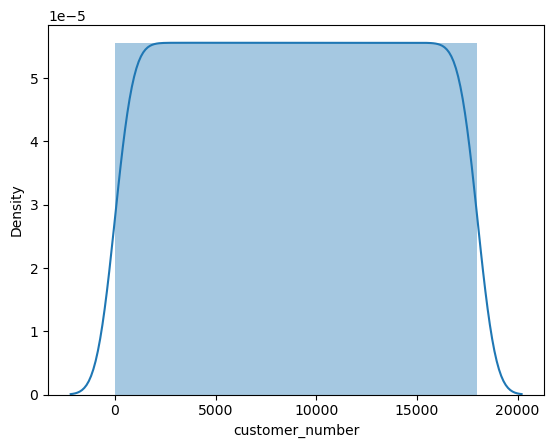

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


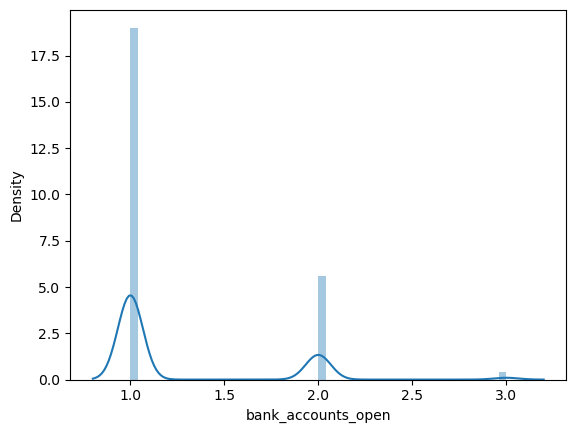

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


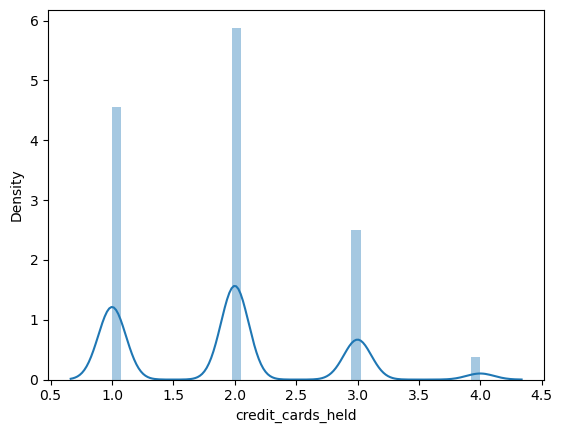

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


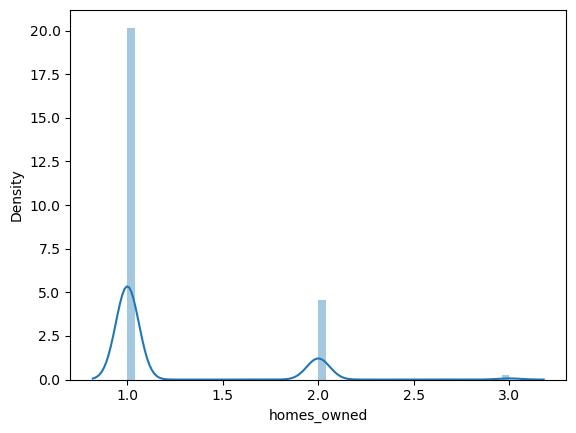

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


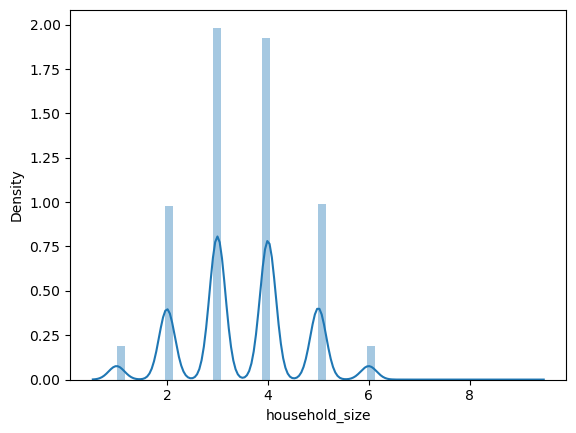

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


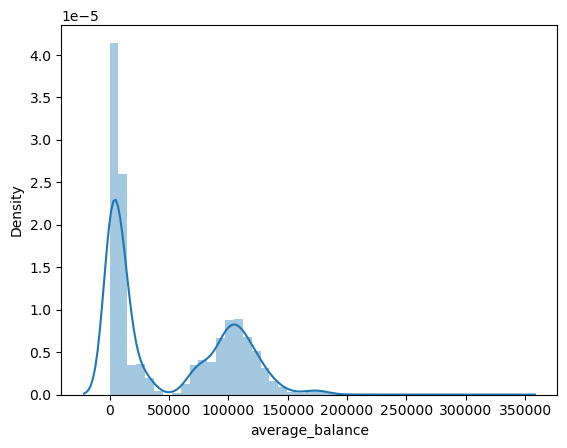

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


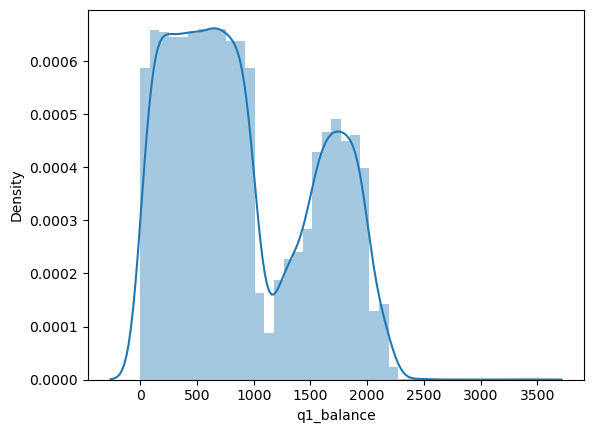

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


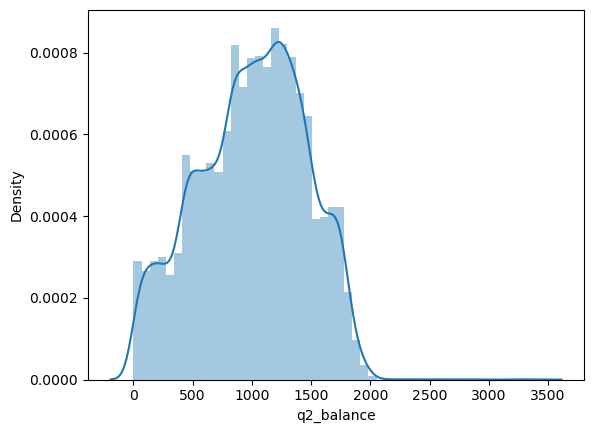

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


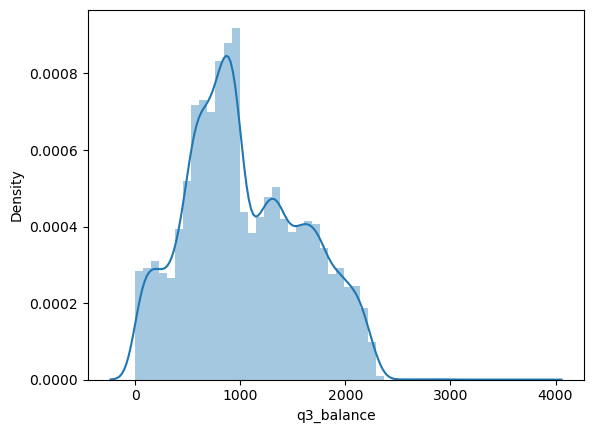

/var/folders/4k/0cy5_djx0y3bcmlpnh2c_xn40000gn/T/ipykernel_7298/2676441781.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(numerical[col])


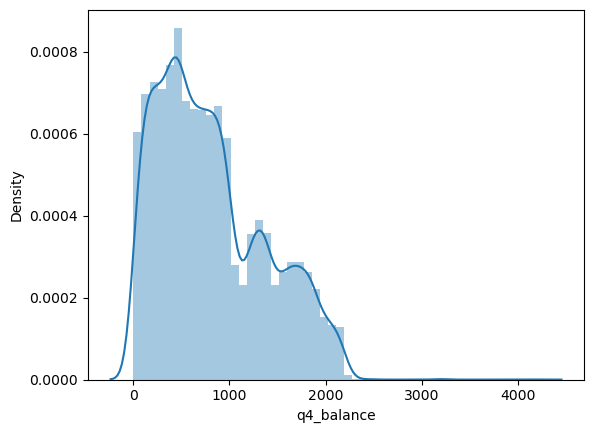

In [12]:
# 5.1 Checking the probability distributions

for col in numerical.columns:
    sns.distplot(numerical[col])
    plt.show()

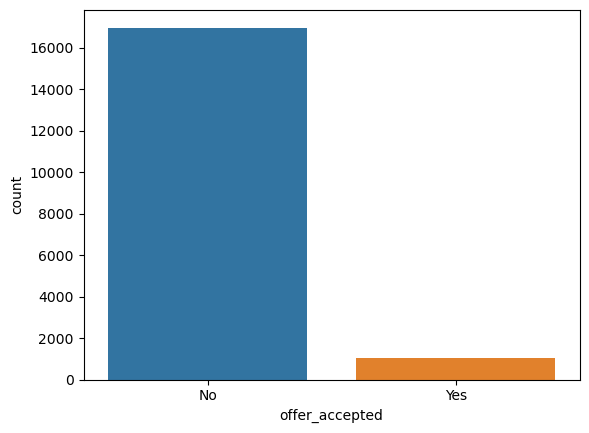

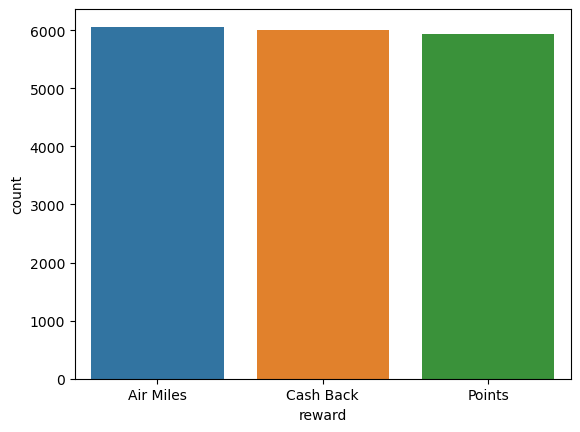

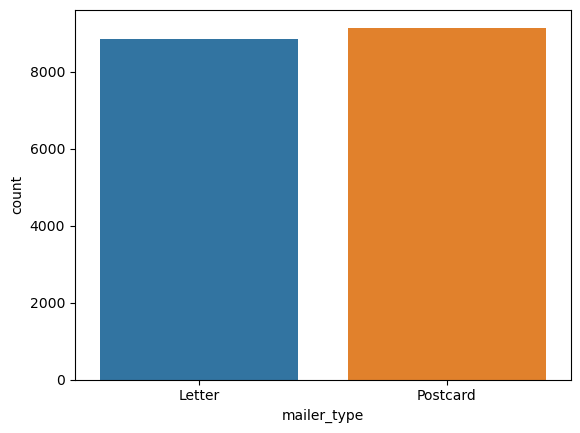

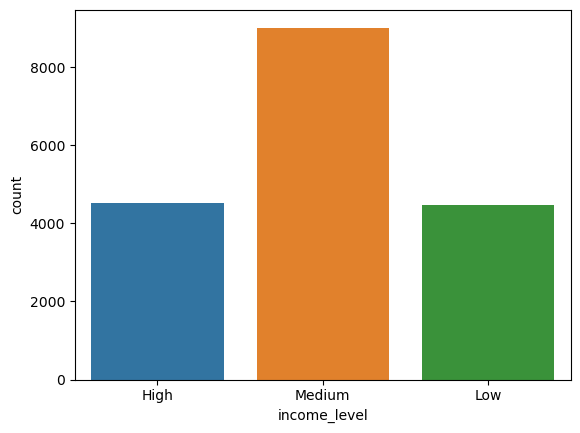

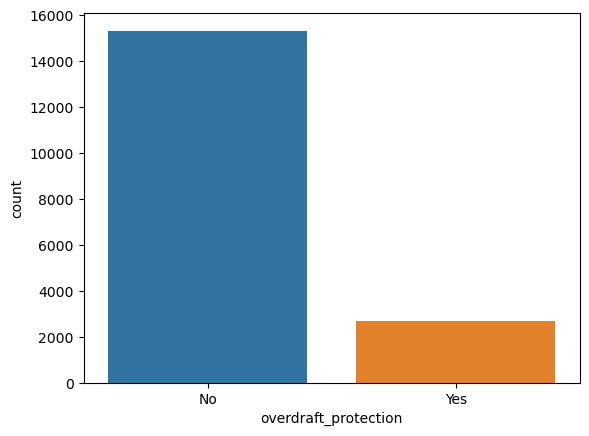

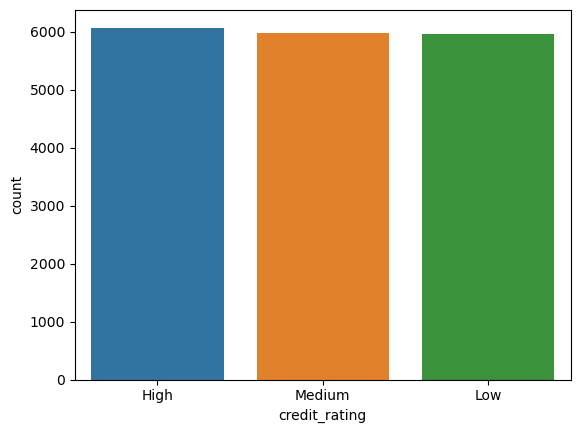

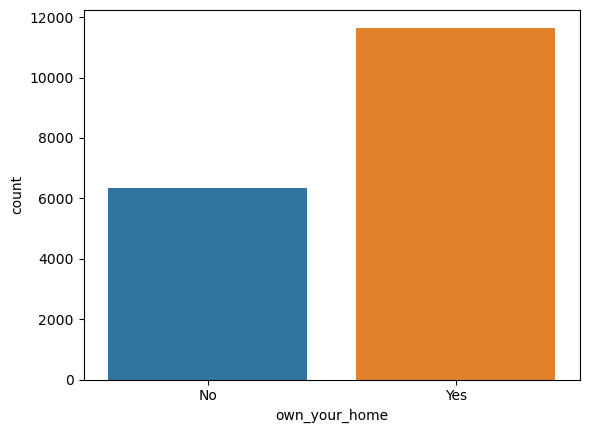

In [13]:


for col in categorical.columns:
    sns.countplot(x= categorical[col])
    plt.show()
    
    

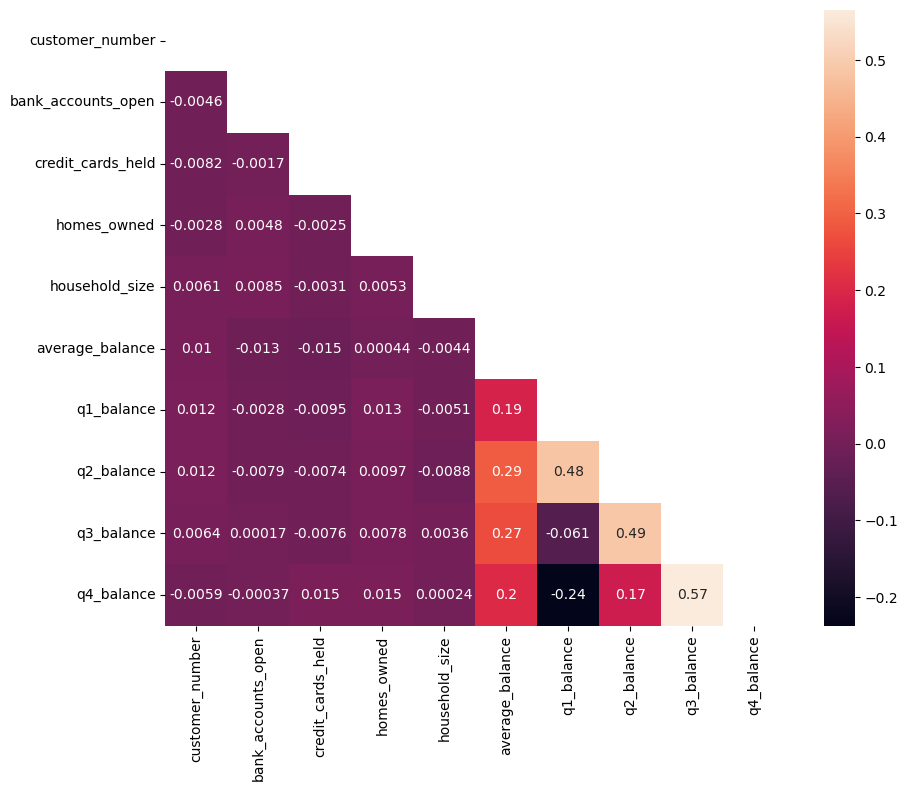

In [14]:
# 5.2 Correlation amongst features - Multicolinearity
# As we don't have any features with correlation higher than 0.9, so we will keep all of the features.

correlations_matrix = numerical.corr()

import pandas as pd
import numpy as np

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)

In [15]:
# 6. Train the model

data3 = data2.copy()


X = pd.get_dummies(data3.drop('offer_accepted', axis=1)) 
y = data3['offer_accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3395
         Yes       0.00      0.00      0.00       205

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.89      0.94      0.92      3600



/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [16]:
# 7.Feature Engineering

from scipy import stats


def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # to avoid -inf in df, we don't use negative or values = 0
        df[column] = np.where(df[column]<=0, np.NAN, df[column])
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci]
    return df, _ci

df, _ci = boxcox_transform(data)
df

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,0.000000,No,Air Miles,Letter,High,0.000000,No,High,0.733744,0.000000,2.818039,No,"1160,75",74.088435,641.949111,174.455700,50.666589
1,0.894607,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.142198,3.712548,Yes,"147,25",10.171733,86.052585,27.370966,30.993911
2,1.661352,No,Air Miles,Postcard,High,0.185052,No,Medium,0.733744,0.000000,0.971838,Yes,"276,5",34.365674,270.063405,42.616104,25.219593
3,2.355318,No,Air Miles,Letter,Medium,0.185052,No,High,0.000000,0.000000,2.818039,No,1219,72.037874,1241.727944,177.086213,33.134138
4,2.999743,No,Air Miles,Letter,Medium,0.000000,No,Medium,0.733744,0.000000,4.593784,Yes,1211,83.885617,970.705700,161.815813,30.951979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,1444.824603,No,Cash Back,Letter,High,0.000000,No,Low,0.000000,0.000000,3.712548,Yes,"167,5",20.406164,53.788370,25.573522,32.304586
17996,1444.881447,No,Cash Back,Letter,High,0.000000,No,Low,1.202918,0.000000,1.906588,Yes,"850,5",56.816475,685.563531,157.348327,37.358359
17997,1444.938291,No,Cash Back,Letter,High,0.000000,No,Low,0.733744,0.000000,2.818039,No,"1087,25",54.859559,565.382097,182.617769,61.387405
17998,1444.995134,No,Cash Back,Letter,Medium,0.000000,No,Medium,1.555081,0.142198,0.971838,Yes,"1022,25",45.180192,715.240920,148.233963,63.718279


In [17]:
X = pd.get_dummies(data3.drop('offer_accepted', axis=1))
y = data3['offer_accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3395
         Yes       0.00      0.00      0.00       205

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.89      0.94      0.92      3600



/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [18]:
# 8.use Normalizer

from sklearn.preprocessing import Normalizer, StandardScaler

scaler = Normalizer()

X = pd.get_dummies(data3.drop('offer_accepted', axis=1))
X_scaled = scaler.fit_transform(X)
y = data3['offer_accepted']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3395
         Yes       0.00      0.00      0.00       205

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.89      0.94      0.92      3600



/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
scaler = StandardScaler()

X = pd.get_dummies(data3.drop('offer_accepted', axis=1))
y = data3['offer_accepted']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3395
         Yes       0.33      0.00      0.01       205

    accuracy                           0.94      3600
   macro avg       0.64      0.50      0.49      3600
weighted avg       0.91      0.94      0.92      3600



In [20]:
# 9. Oversampeling
from imblearn.over_sampling import SMOTE

X = pd.get_dummies(data3.drop('offer_accepted', axis=1))
y = data3['offer_accepted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()



offer_accepted
Yes    13582
No     13582
Name: count, dtype: int64

In [21]:
classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96      3395
         Yes       0.12      0.06      0.08       205

    accuracy                           0.92      3600
   macro avg       0.53      0.52      0.52      3600
weighted avg       0.90      0.92      0.91      3600



/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
# 10.UnderSampling

from imblearn.under_sampling import RandomUnderSampler

X = pd.get_dummies(data3.drop('offer_accepted', axis=1))
y = data3['offer_accepted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


undersample = RandomUnderSampler(random_state=42)
X_train, y_train = undersample.fit_resample(X_train, y_train)


classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train, y_train)


predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

          No       0.98      0.65      0.78      3395
         Yes       0.11      0.75      0.20       205

    accuracy                           0.65      3600
   macro avg       0.55      0.70      0.49      3600
weighted avg       0.93      0.65      0.75      3600



In [23]:
# 11.Tomek Links

from imblearn.under_sampling import TomekLinks


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


tomek_links = TomekLinks(sampling_strategy='majority')
X_train_res, y_train_res = tomek_links.fit_resample(X_train, y_train)


classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(X_train_res, y_train_res)


predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

          No       0.94      1.00      0.97      3395
         Yes       0.00      0.00      0.00       205

    accuracy                           0.94      3600
   macro avg       0.47      0.50      0.49      3600
weighted avg       0.89      0.94      0.92      3600



/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elnazshahzeidi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [24]:
# 12.class_weight



classification = LogisticRegression(random_state=42, max_iter=100000, class_weight='balanced')


classification.fit(X_train, y_train)


predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

          No       0.98      0.66      0.79      3395
         Yes       0.12      0.75      0.20       205

    accuracy                           0.67      3600
   macro avg       0.55      0.70      0.50      3600
weighted avg       0.93      0.67      0.76      3600



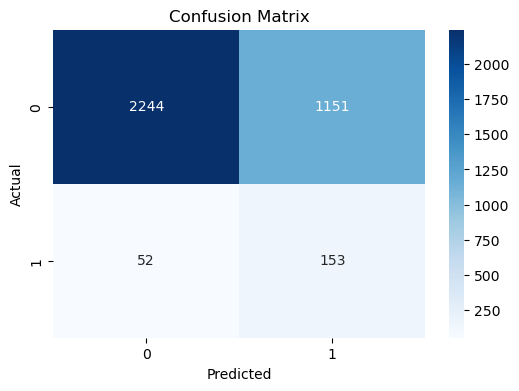

In [25]:
# 13.Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(6,4))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()





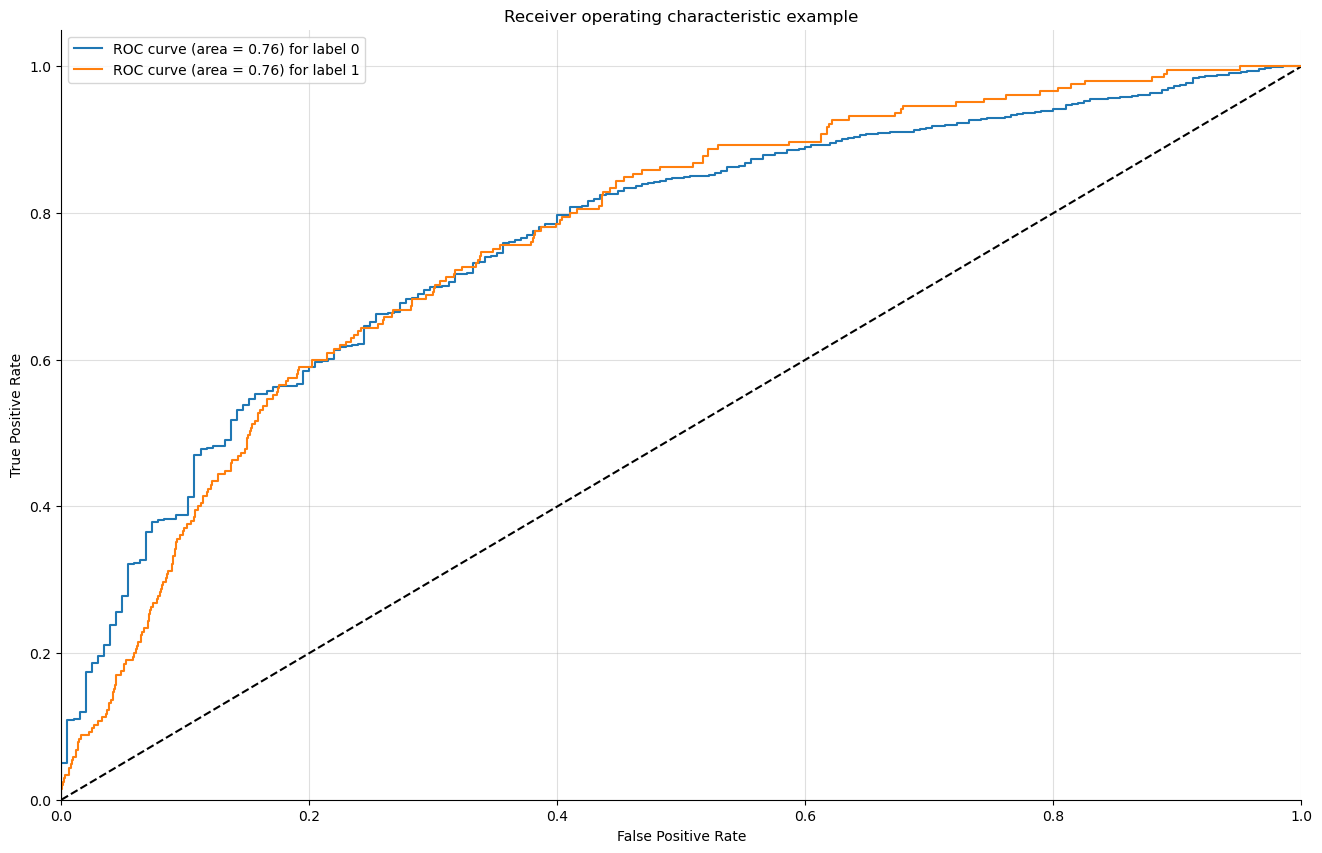

In [26]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiclass_roc(clf, X_test, y_test, figsize=(17, 6)):
    # Use predict_proba instead of decision_function
    y_score = clf.predict_proba(X_test)

    # Get the number of unique classes from y_test
    n_classes = len(set(y_test))

    # Initialize structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # One-hot encode the y_test labels for each class
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

    # Loop through each class and calculate ROC curve and AUC
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')

    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Example of calling the function
plot_multiclass_roc(classification, X_test, y_test, figsize=(16, 10))


In [27]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.98      0.66      0.79      3395
         Yes       0.12      0.75      0.20       205

    accuracy                           0.67      3600
   macro avg       0.55      0.70      0.50      3600
weighted avg       0.93      0.67      0.76      3600



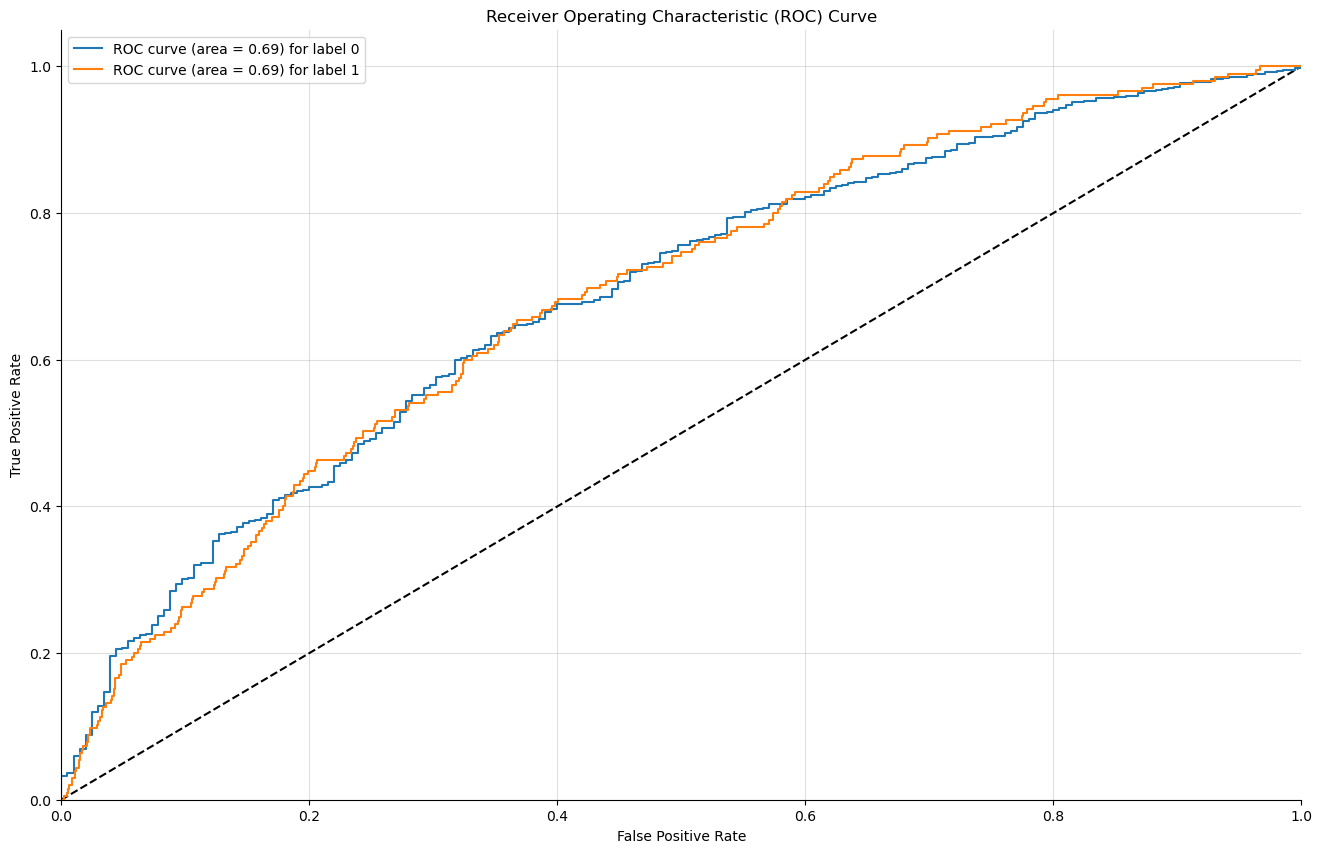


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3395
           1       0.15      0.22      0.18       205

    accuracy                           0.88      3600
   macro avg       0.55      0.57      0.56      3600
weighted avg       0.91      0.88      0.89      3600



In [33]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_multiclass_roc(clf, X_test, y_test, figsize=(17, 6)):
    # Use predict_proba to get probabilities
    y_score = clf.predict_proba(X_test)

    # Get the number of unique classes from y_test
    n_classes = len(set(y_test))

    # Initialize structures to store FPR, TPR, and ROC-AUC values for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # One-hot encode the y_test labels for each class (for multi-class)
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

    # Loop through each class and calculate ROC curve and AUC
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')

    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))

    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
    
    
    
     # Classification report
    y_pred = clf.predict(X_test)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))

# Example of calling the function
plot_multiclass_roc(classification, X_test, y_test, figsize=(16, 10))



Interpretation:

* The model performs well on class 0 (the majority class), with high precision, recall, and F1-score.

* The model performs poorly on class 1 (the minority class). It struggles to identify positive instances, as reflected by the low precision (0.15) and recall (0.22).

* The high overall accuracy (0.88) is misleading due to the class imbalance, as the model is biased towards the majority class (0).